Aim : Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or previntive measures to stop or control the attrition.


Summary of Data -

A) Categorical Variables :
    
1) Attrition - Describe status of attrition (dichotomous variable, values – Yes, No) --- Dependent Variable
2) BusinessTravel - Describe official travelling of employees (categorical variable having 3 Labels - Non-Travel, Travel_Frequently, Travel_Rarely)
3) Department - Department of employee (categorical variable having 3 labels - Human Resources, Research & Development, Sales)
4) EducationField - Education Stream of employee (categorical variable having 6 labels-Human Resources, Life Sciences, Marketing, Medical, Other, Technical Degree)
5) Gender - Describe gender of employee Categorical variable (2 labels - Female, Male)
6) JobRole - Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
7) MaritalStatus - Marital Status(Categorical Variable having 3 labels - Divorced,Married,Single)
9) Over18 - Status of adult employee(categorical variable having 1 category - Y)
10) OverTime - OverTime status(categorical variable having 2 category - Yes, No)


B) Categorical Variables - ordinal data :

1) Education - Education of employee in rating (categorical variables ordinal data, 5 Ratings 1, 2, 3, 4, 5)
2) EnvironmentSatisfaction - Job Environment Stratification of employee (rating scale data 1, 2, 3, 4 categorical variable nominal/ordinal data)
3) JobInvolvement - Engagement in the job (Rating data having 4 ratings 1,2,3,4 categorical variable)
4) JobLevel - Level of job in organization structure (Rating data having 5 ratings 1, 2,3,4,5 categorical variable)
5) JobSatisfaction - Stratification of employee within job (rating scale data 1, 2, 3, 4 categorical variable nominal/ordinal data)
6) NumCompaniesWorked - Number of company employee worked for(Count data having 0,1,2,3,4,5,6,7,8,9, continuous variable)
7) PerformanceRating - Performance rating (Rating data ,Categorical nominal/ordinal data- 3,4)
8) RelationshipSatisfaction - Shows status of Relationship with Managers(Rating data 4 labels ,Categorical nominal/ordinal data-1,2,3,4)
9) StockOptionLevel - stock option(Rating data 4 labels ,Categorical nominal/ordinal data-1,2,3,4)
10) WorkLifeBalance - WorkLifeBalance : rating 1,2,3,4


C) Numerical Data :
    
1) Age - Age of employee (continuous variable)
2) DailyRate - Daily rate of employee (continuous variable)
3) DistanceFromHome - Distance of office from home in km (continuous variable)
4) EmployeeCount - Count of employee (Continuous variable and only 1 value present like a Constant)
5) EmployeeNumber - Employee identification number an ID variable
6) HourlyRate - Describe hourly rate of employee (Continuous variable)
7) MonthlyIncome - Monthly income of employee(Continuous variable)
8) MonthlyRate - Monthly rate of employee(Continuous variable)
9) PercentSalaryHike - Salary hike %age (continuous variable Percentage figures)
10) StandardHours - Standard working hours (Numerical data , 80 hours for everybody, almost constant data)
11) TotalWorkingYears - Total year of experience(Continuous variable)
12) TrainingTimesLastYear - Training Time(Continuous variable)
13) YearsAtCompany - Years in current company(Continuous variable)
14) YearsInCurrentRole - Years in current Role(Continuous variable)
15) YearsSinceLastPromotion - Years Since last Promotion(Continuous variable)
16) YearsWithCurrManager - Years in current Managerial role(Continuous variable)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from csv file HR_Employee_Attrition_Data

employee_df = pd.read_csv('HR_Employee_Attrition_Data.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Shape of dataset

employee_df.shape

(2940, 35)

In [4]:
# Getting basic information of dataset

employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
# Getting Five number summery of Numerical columns

employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Checking for null values

employee_df.isnull().sum()   #There is no null values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Checking unique values in each column

employee_df.nunique().sort_values(ascending=False)

EmployeeNumber              2940
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
BusinessTravel                 3
Department                     3
MaritalStatus                  3
PerformanceRating              2
OverTime                       2
Attrition 

In [8]:
employee = employee_df

# Separating Categorical columns and Numerical columns

In [9]:
#Getting all columns

employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# Getting Categorical columns

categorical_col = employee.select_dtypes(include=['object']).columns.tolist()
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [11]:
# Getting Categorical columns

numerical_col = employee.select_dtypes(include=['int64']).columns.tolist()
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Countplot For Categorical Columns

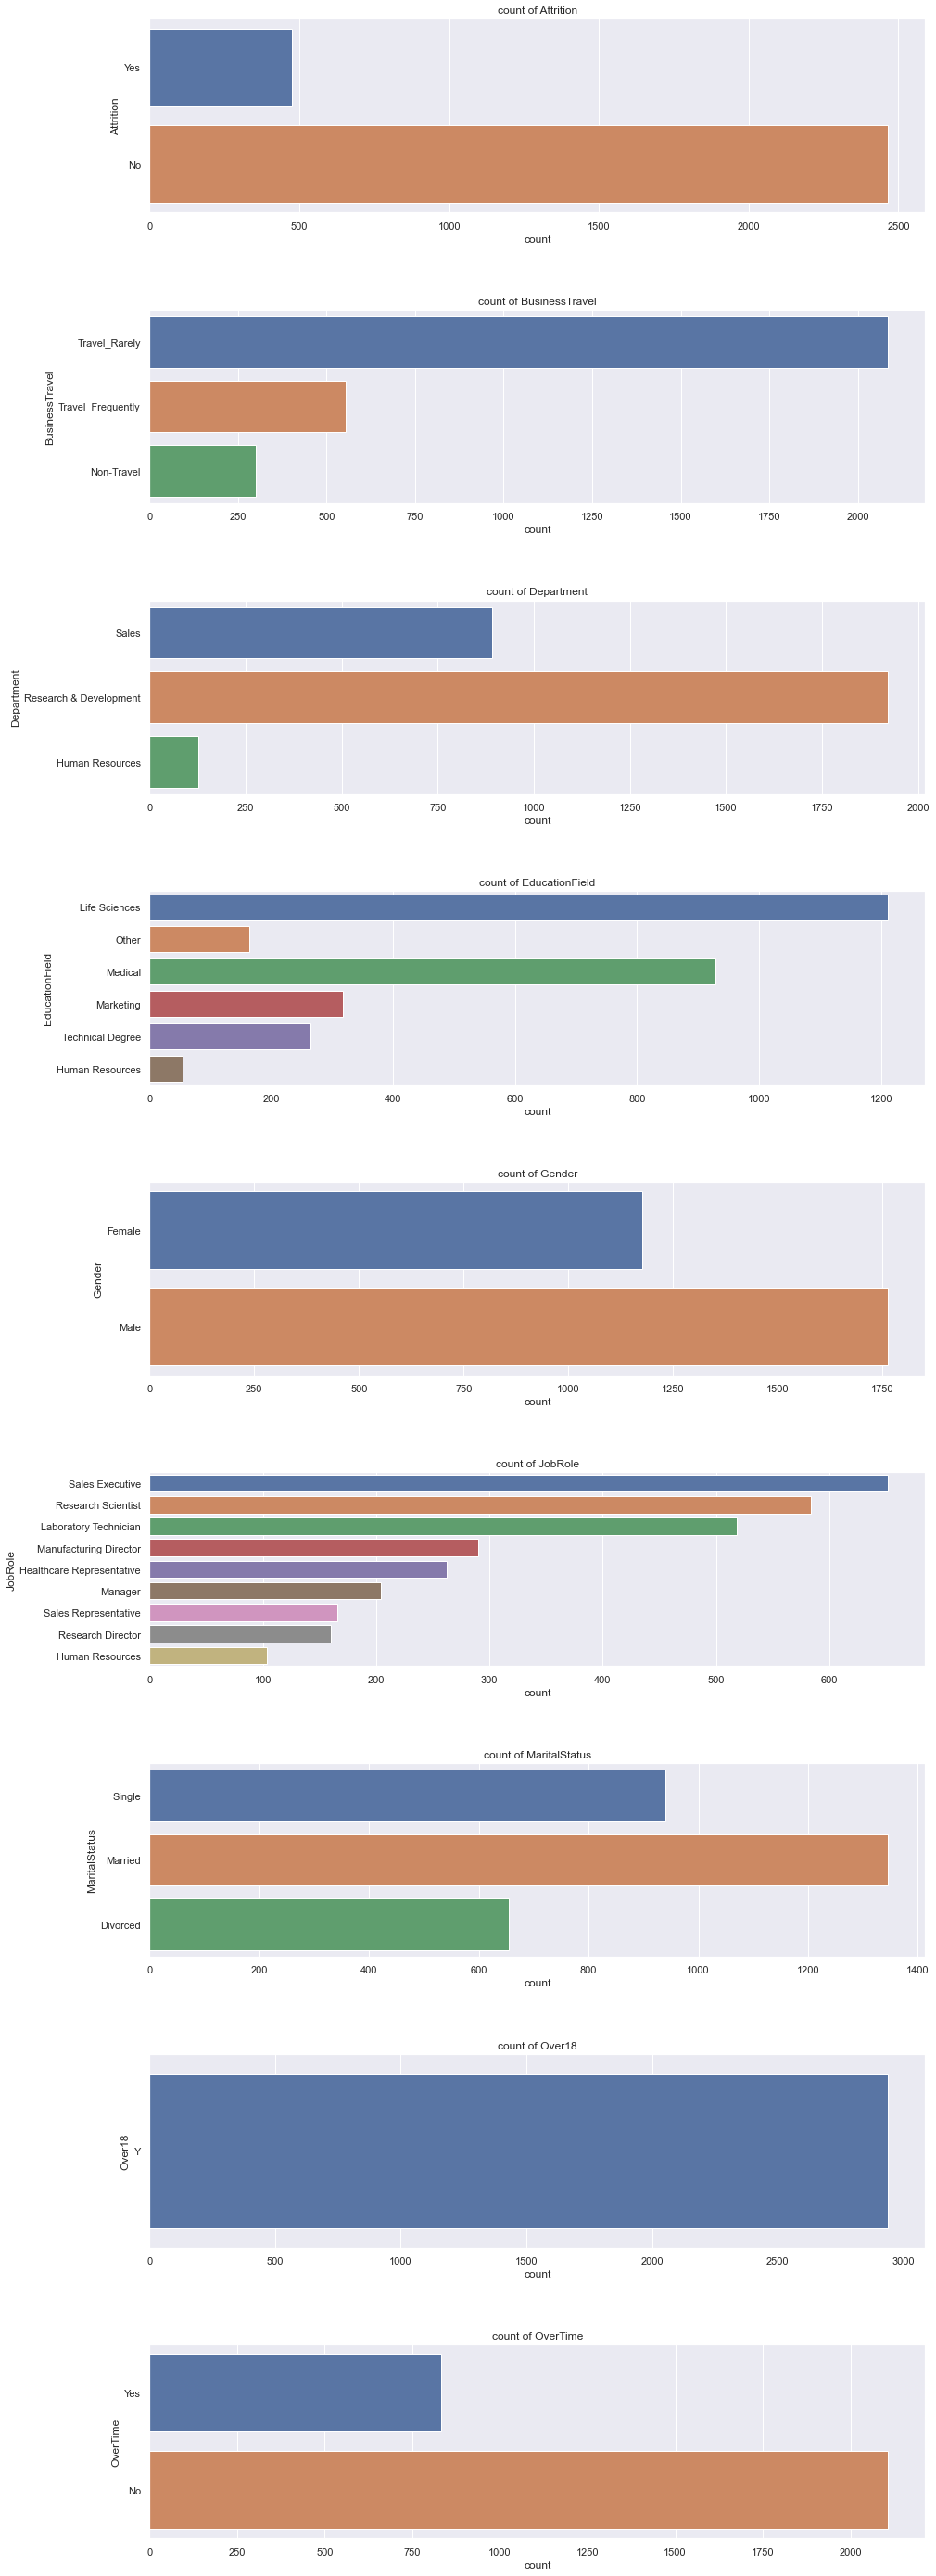

In [12]:
sns.set_theme()
fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(15, 50))
fig.subplots_adjust(hspace=.5)
plt.title('Countplot for categorical variables')

for i, col in enumerate(categorical_col):
    sns.countplot(y=col, data=employee, ax=ax[i])
    ax[i].set_title('count of {}'.format(col))

# Data Preprocessing For Categorical Columns

In [13]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['Over18'] = le.fit_transform(res_df['Over18'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    return res_df

In [14]:
employee = preprocessor(employee)
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,5,...,4,80,1,6,3,3,2,2,2,2


# Cheking for the Zero Variance

In [15]:
selector = VarianceThreshold(threshold=0)
selector.fit(employee)

VarianceThreshold(threshold=0)

In [16]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True])

In [17]:
employee.columns[selector.get_support()]

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
# Get features which have the variance less than the set threshold values using list comprehension

selected_cols = [column for column in employee.columns if column not in employee.columns[selector.get_support()]]

In [19]:
selected_cols  #There are 3 zero variance columns 

['EmployeeCount', 'Over18', 'StandardHours']

In [20]:
# Drop those columns from the dataset where varience is less than 1

employee1 = employee.drop(selected_cols, axis=1)
employee1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,3,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,5,1,...,3,4,1,6,3,3,2,2,2,2


In [21]:
# Checking shape after dropping zero variance columns

employee1.shape

(2940, 32)

# Correlation Check

<AxesSubplot:>

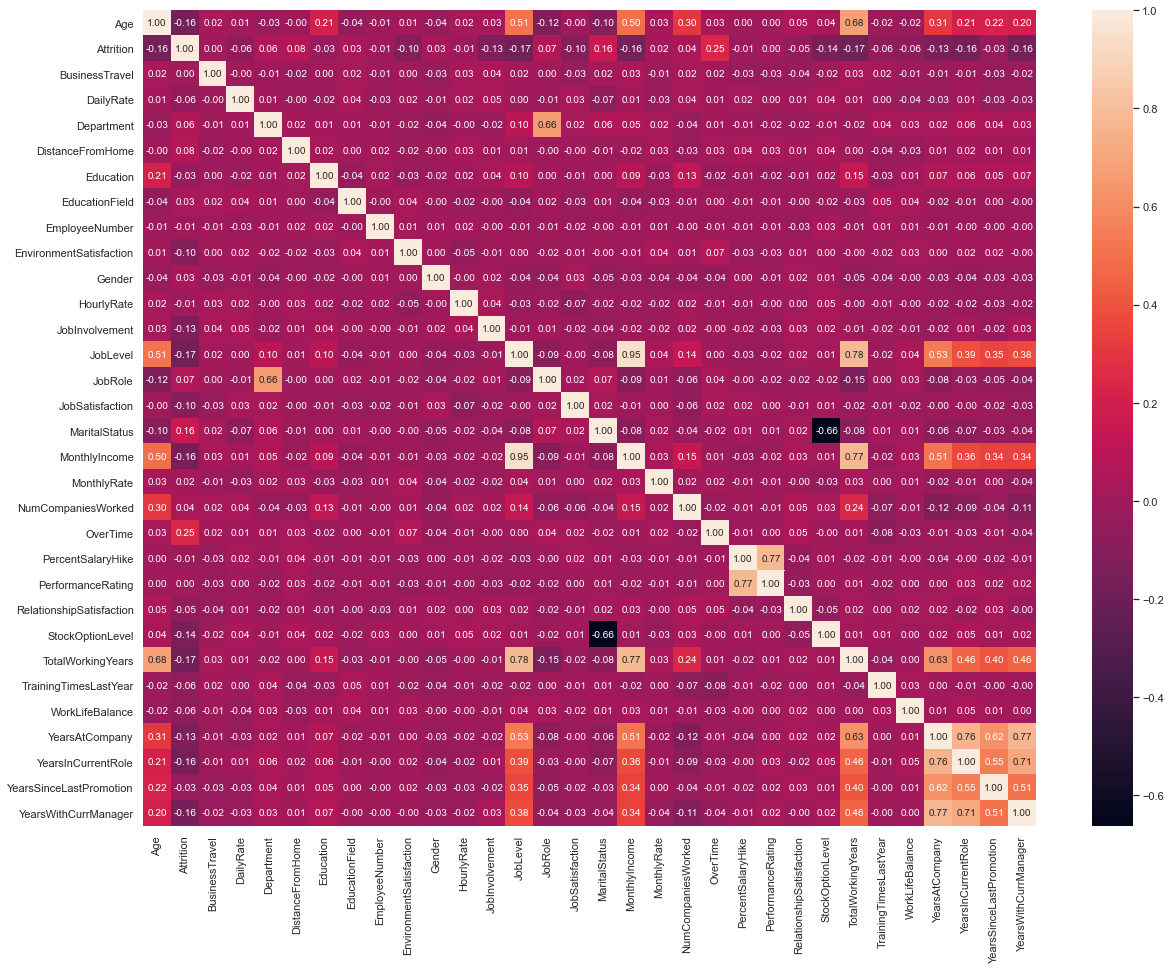

In [22]:
correlations = employee1.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(correlations, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10})

In [23]:
def correlation(dataset, threshold):
    col_corr = list() # list of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
    return col_corr

In [24]:
corr_feature = correlation(employee1, 0.75)
len(set(corr_feature))

5

In [25]:
corr_feature   # There are 5 correlated variables in dataset

['MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [26]:
# Dropping the correlated columns

employee2 = employee1.drop(corr_feature, axis=1)
employee2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,1102,2,1,2,1,1,2,...,19479,8,1,11,1,0,0,1,6,0
1,49,0,1,279,1,8,1,1,2,3,...,24907,1,0,23,4,1,3,3,10,1
2,37,1,2,1373,1,2,2,4,3,4,...,2396,6,1,15,2,0,3,3,0,0
3,33,0,1,1392,1,3,4,1,4,4,...,23159,1,1,11,3,0,3,3,8,3
4,27,0,2,591,1,2,1,3,5,1,...,16632,9,0,12,4,1,3,3,2,2


In [27]:
# Checking shape after dropping correlated variables

employee2.shape

(2940, 27)

In [28]:
# Checking the columns after dropping

employee2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

In [29]:
# Getting numerical columns after dropping the columns

numerical_col = employee2.select_dtypes(include=['int64']).columns.tolist()
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

In [30]:
# Getting length of the total number of columns
len(numerical_col)

19

# Distribution of numerical attributes

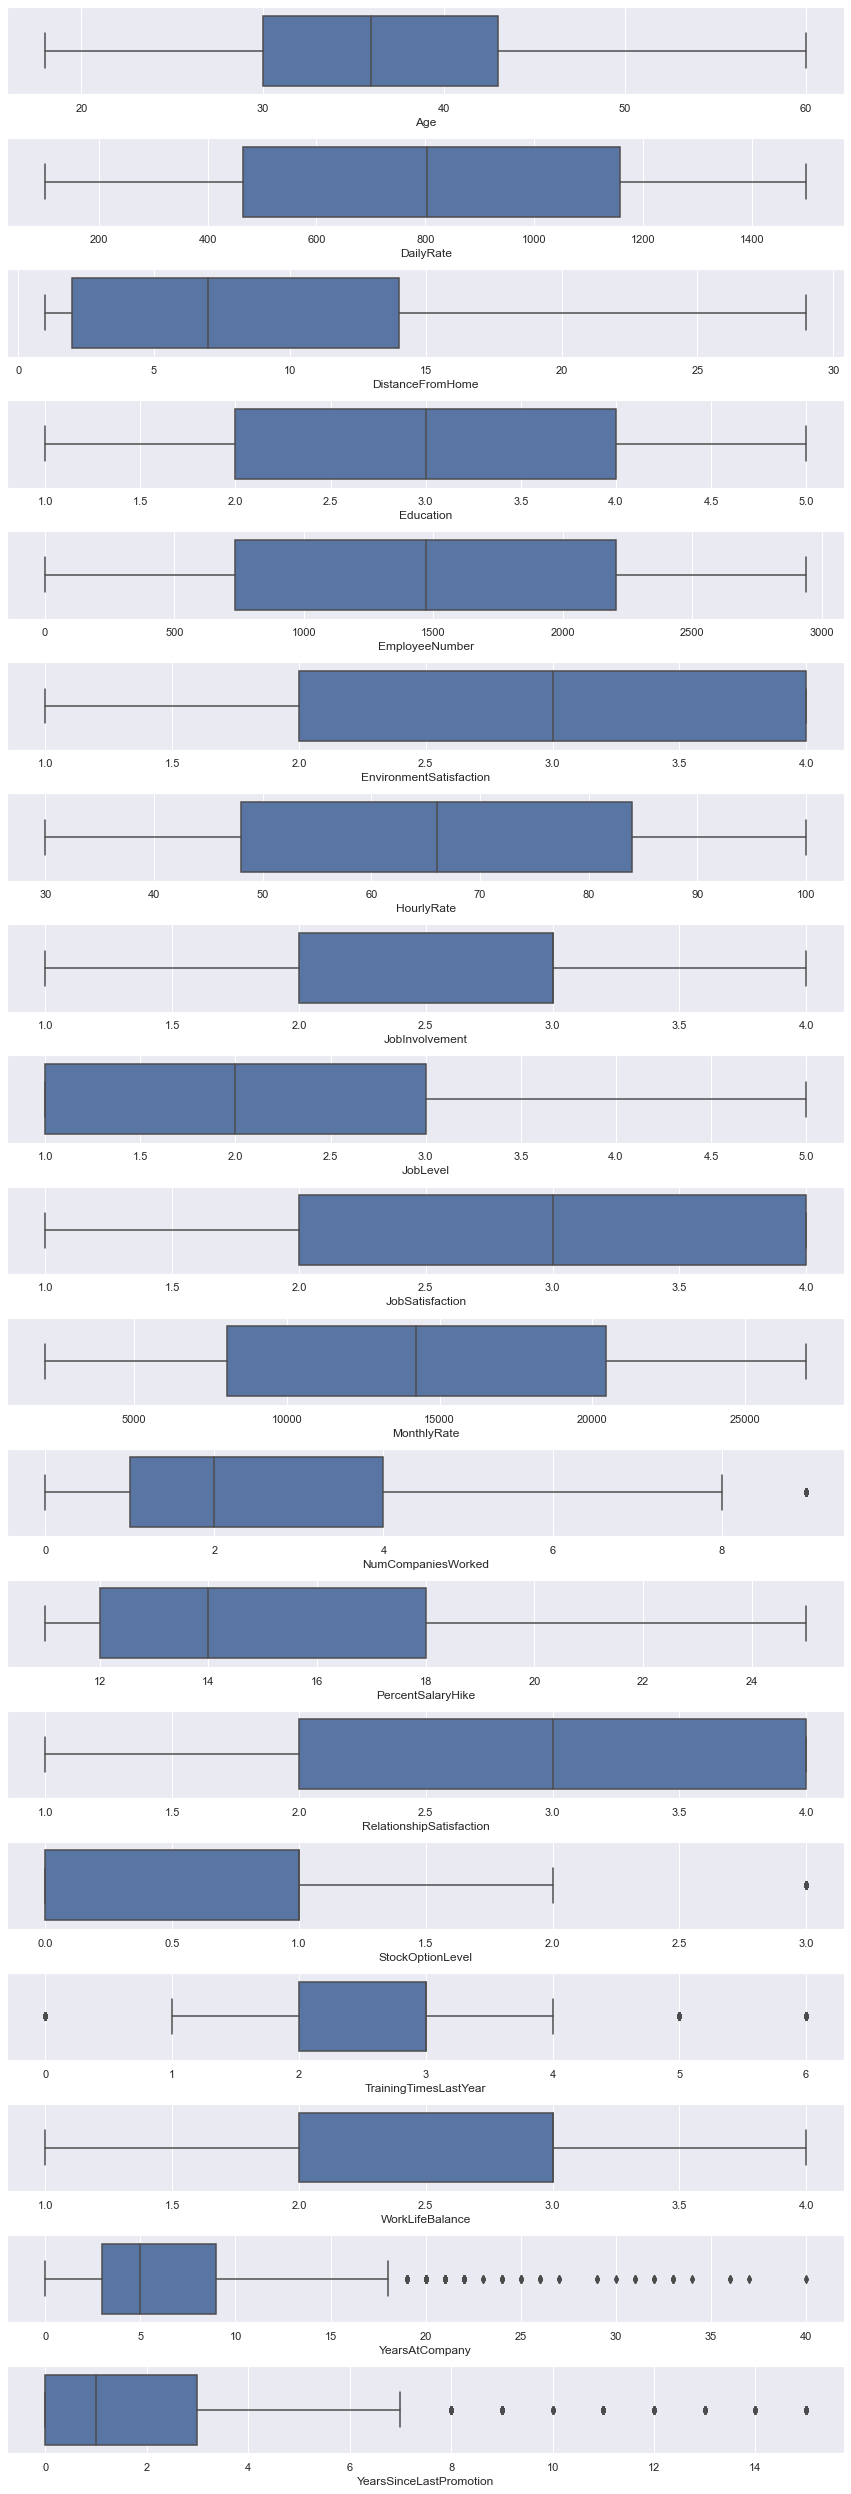

In [31]:
fig, ax = plt.subplots(nrows=19, ncols=1, figsize=(15, 45)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(numerical_col):
    sns.boxplot(x=employee2[col], ax=ax[i])
#     ax[i].set_title('Distribution of {}'.format(col))

# Handling Outliers by Capping and Flooring

In [32]:
# define a function called 'iqr_outliers_cap_floor'
# IQR = Q3 - Q1
# +/- 1.5 * IQR

def iqr_outliers_cap_floor(df, cols, factor):
    for ft in cols:
        Q1 = df[ft].quantile(0.25)
        Q3 = df[ft].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        df[ft] = np.where(df[ft] > upper_limit, upper_limit, np.where(df[ft] < lower_limit, lower_limit, df[ft]))

In [33]:
# Calling function 'iqr_outliers_cap_floor'

iqr_outliers_cap_floor(employee2, numerical_col, 1.5)

In [34]:
employee2.shape

(2940, 27)

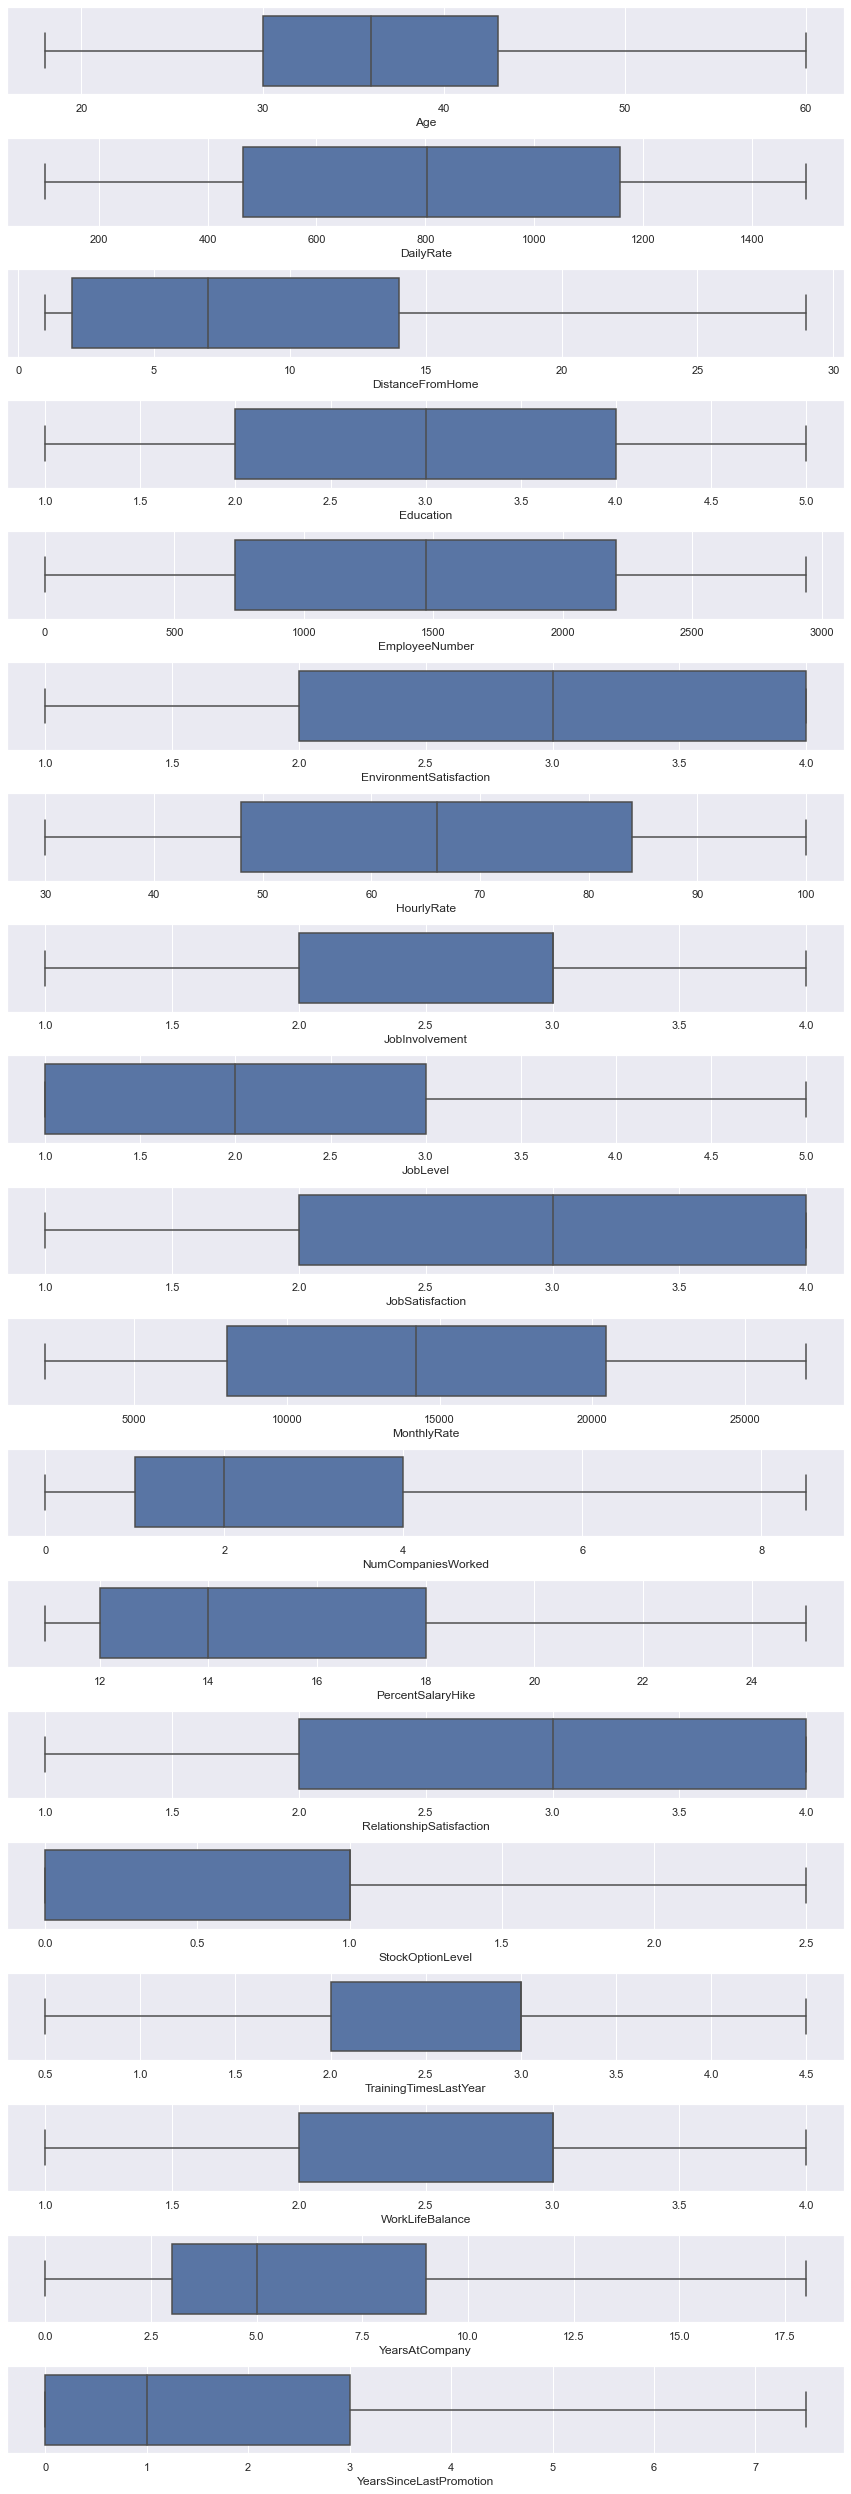

In [35]:
fig, ax = plt.subplots(nrows=19, ncols=1, figsize=(15, 45)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(numerical_col):
    sns.boxplot(x=employee2[col], ax=ax[i])
#     ax[i].set_title('Distribution of {}'.format(col))

# Split the data into X and Y

In [36]:
x = employee2.drop(['Attrition'], axis = 1).values
y = employee2['Attrition'].values

# Standardization & Scaling of Features

In [37]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)

In [38]:
#Split the data into Train-Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Logistic Regression Model

In [39]:
# Instantiate the model (using the default parameters)

logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

# Predictions

In [40]:
logistic_prediction = logistic_reg.predict(x_test)

# Performance & Accuracy

In [41]:
log_accuracy_score = metrics.accuracy_score(y_test, logistic_prediction)
log_precision_score = metrics.precision_score(y_test, logistic_prediction)
log_recall_score = metrics.recall_score(y_test, logistic_prediction)

print("Accuracy:", log_accuracy_score * 100)
print("Precision:", log_precision_score * 100)
print("Recall:", log_recall_score * 100)

Accuracy: 86.56462585034014
Precision: 70.0
Recall: 35.35353535353536


In [42]:
y_pred_dt = logistic_reg.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Area Under the Curve

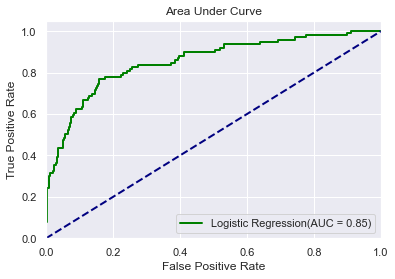

In [43]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [44]:
print (confusion_matrix(y_test, logistic_prediction))

[[474  15]
 [ 64  35]]


In [45]:
import itertools

def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


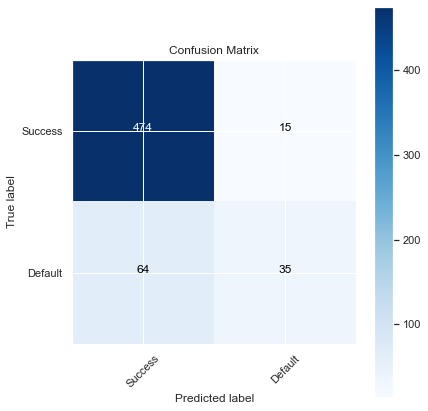

In [46]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(logistic_prediction, normalize=False)
plt.show()

# Result store in csv file

In [47]:
y = pd.DataFrame(x_test)
y['y_test'] = y_test
y['Predictions'] = logistic_prediction
y = y.reset_index(drop=True)
y.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,y_test,Predictions
0,-1.196177,0.590048,1.441633,-0.493817,-0.764121,1.061787,0.565311,0.993867,-1.575686,0.816497,...,-0.628241,1.855984,-0.658973,0.300537,-0.685123,0.338096,0.277123,-0.776139,0,0
1,0.665354,-0.913194,-0.943263,-0.493817,-1.010909,0.085049,-0.937414,-0.965589,1.169781,-1.224745,...,-0.628241,-0.603911,-0.658973,0.300537,-0.685123,-1.077862,-0.324310,0.031166,0,0
2,-0.539166,-0.913194,-1.701868,-0.493817,0.469821,0.085049,1.316673,1.037463,0.254625,-1.224745,...,-0.628241,1.309341,0.266233,0.300537,-0.685123,0.338096,-0.925742,0.031166,0,0
3,-1.962690,0.590048,-1.238276,-0.493817,-0.887515,0.085049,-0.937414,-1.522909,-0.660531,0.816497,...,-0.628241,1.855984,0.266233,-0.978160,0.278639,-1.077862,-1.126220,-0.372486,1,0
4,-0.429664,0.590048,-0.536690,1.401512,-1.010909,0.085049,0.565311,0.729936,-1.575686,0.816497,...,-0.628241,1.855984,-1.584178,0.300537,1.724281,0.338096,0.477600,-0.776139,0,0


In [48]:
y.columns=[['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 
            'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 
            'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
            'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
            'YearsSinceLastPromotion', 'Attrition', 'Predictions']]
y.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Attrition,Predictions
0,-1.196177,0.590048,1.441633,-0.493817,-0.764121,1.061787,0.565311,0.993867,-1.575686,0.816497,...,-0.628241,1.855984,-0.658973,0.300537,-0.685123,0.338096,0.277123,-0.776139,0,0
1,0.665354,-0.913194,-0.943263,-0.493817,-1.010909,0.085049,-0.937414,-0.965589,1.169781,-1.224745,...,-0.628241,-0.603911,-0.658973,0.300537,-0.685123,-1.077862,-0.324310,0.031166,0,0
2,-0.539166,-0.913194,-1.701868,-0.493817,0.469821,0.085049,1.316673,1.037463,0.254625,-1.224745,...,-0.628241,1.309341,0.266233,0.300537,-0.685123,0.338096,-0.925742,0.031166,0,0
3,-1.962690,0.590048,-1.238276,-0.493817,-0.887515,0.085049,-0.937414,-1.522909,-0.660531,0.816497,...,-0.628241,1.855984,0.266233,-0.978160,0.278639,-1.077862,-1.126220,-0.372486,1,0
4,-0.429664,0.590048,-0.536690,1.401512,-1.010909,0.085049,0.565311,0.729936,-1.575686,0.816497,...,-0.628241,1.855984,-1.584178,0.300537,1.724281,0.338096,0.477600,-0.776139,0,0


In [49]:
y.to_csv('Emp_Attrition_Logistic_Reg_Prediction.csv')

# Implementing GridSearchCV

In [50]:
param_dict = {
    "criterion": ['gini'],
    "max_depth": [2, 4, 6],
    "min_samples_split":[2, 4, 6],
    "min_samples_leaf": [2, 4, 6]
}

In [51]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dict, cv=10)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 4, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]})

In [52]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [53]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=42)

In [54]:
grid.best_score_

0.8711684096646231

# Build the Decision Tree Model

In [55]:
model_dt = DecisionTreeClassifier(random_state=42, max_depth=6, criterion = "gini", min_samples_leaf= 2, min_samples_split= 2)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ", model_dt_score_train * 100)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ", model_dt_score_test * 100)

Training score:  91.70918367346938
Testing score:  87.24489795918367


# Predictions

In [56]:
predictions = model_dt.predict(x_test)

# Performance Metrics

In [57]:
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [58]:
tree_accuracy_score = metrics.accuracy_score(y_test, predictions)
tree_precision_score = metrics.precision_score(y_test, predictions)
tree_recall_score = metrics.recall_score(y_test, predictions)

print("Accuracy:", tree_accuracy_score * 100)
print("Precision:", tree_precision_score * 100)
print("Recall:", tree_recall_score * 100)

Accuracy: 87.24489795918367
Precision: 72.22222222222221
Recall: 39.39393939393939


# Area Under the Curve

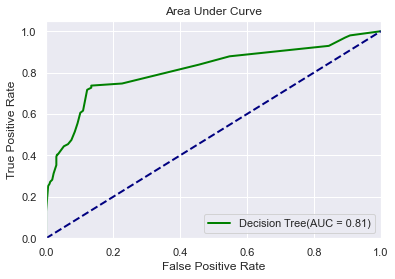

In [59]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [60]:
print (confusion_matrix(y_test, predictions))

[[474  15]
 [ 60  39]]


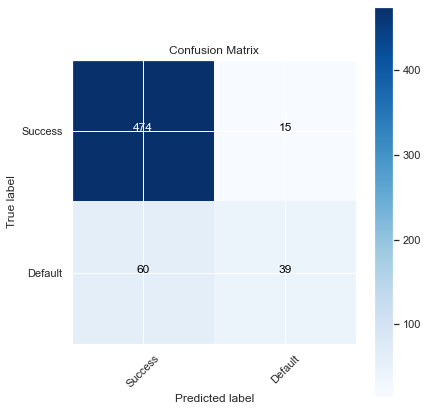

In [61]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Result store in csv file

In [62]:
y = pd.DataFrame(x_test)
y['y_test'] = y_test
y['Predictions'] = predictions
y = y.reset_index(drop=True)
y.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,y_test,Predictions
0,-1.196177,0.590048,1.441633,-0.493817,-0.764121,1.061787,0.565311,0.993867,-1.575686,0.816497,...,-0.628241,1.855984,-0.658973,0.300537,-0.685123,0.338096,0.277123,-0.776139,0,0
1,0.665354,-0.913194,-0.943263,-0.493817,-1.010909,0.085049,-0.937414,-0.965589,1.169781,-1.224745,...,-0.628241,-0.603911,-0.658973,0.300537,-0.685123,-1.077862,-0.324310,0.031166,0,0
2,-0.539166,-0.913194,-1.701868,-0.493817,0.469821,0.085049,1.316673,1.037463,0.254625,-1.224745,...,-0.628241,1.309341,0.266233,0.300537,-0.685123,0.338096,-0.925742,0.031166,0,0
3,-1.962690,0.590048,-1.238276,-0.493817,-0.887515,0.085049,-0.937414,-1.522909,-0.660531,0.816497,...,-0.628241,1.855984,0.266233,-0.978160,0.278639,-1.077862,-1.126220,-0.372486,1,1
4,-0.429664,0.590048,-0.536690,1.401512,-1.010909,0.085049,0.565311,0.729936,-1.575686,0.816497,...,-0.628241,1.855984,-1.584178,0.300537,1.724281,0.338096,0.477600,-0.776139,0,0


In [63]:
y.columns=[['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 
            'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 
            'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
            'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
            'YearsSinceLastPromotion', 'Attrition', 'Predictions']]
y.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Attrition,Predictions
0,-1.196177,0.590048,1.441633,-0.493817,-0.764121,1.061787,0.565311,0.993867,-1.575686,0.816497,...,-0.628241,1.855984,-0.658973,0.300537,-0.685123,0.338096,0.277123,-0.776139,0,0
1,0.665354,-0.913194,-0.943263,-0.493817,-1.010909,0.085049,-0.937414,-0.965589,1.169781,-1.224745,...,-0.628241,-0.603911,-0.658973,0.300537,-0.685123,-1.077862,-0.324310,0.031166,0,0
2,-0.539166,-0.913194,-1.701868,-0.493817,0.469821,0.085049,1.316673,1.037463,0.254625,-1.224745,...,-0.628241,1.309341,0.266233,0.300537,-0.685123,0.338096,-0.925742,0.031166,0,0
3,-1.962690,0.590048,-1.238276,-0.493817,-0.887515,0.085049,-0.937414,-1.522909,-0.660531,0.816497,...,-0.628241,1.855984,0.266233,-0.978160,0.278639,-1.077862,-1.126220,-0.372486,1,1
4,-0.429664,0.590048,-0.536690,1.401512,-1.010909,0.085049,0.565311,0.729936,-1.575686,0.816497,...,-0.628241,1.855984,-1.584178,0.300537,1.724281,0.338096,0.477600,-0.776139,0,0


In [64]:
y.to_csv('Emp_Attrition_Decision_Tree_Prediction.csv')